<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Recursive Feature Elimination

WHO Life Expectancy Data

In [7]:
# Common Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import warnings
import warnings
warnings.filterwarnings("ignore")

# Libraries from Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
!ls *.csv

1_Life_Expectancy_Data.csv  1_who_le_data.csv


# RE-Packagaging DATA

In [5]:
column_names = [
    'Cty', 'Yr', 'Dev', 'L_Expec', 'A_Mort', 'Inf_D', 'Alc', 'Per_Expen',
    'HepB', 'Mes', 'BMI', 'lt5y_D', 'Polio', 'T_Expen', 'Dipt', 'HIV', 'GDP',
    'Pop', 'Th_1-19y', 'Th_5-9y', 'Income', 'Ed'
]

df = pd.read_csv('1_Life_Expectancy_Data.csv', header=0, names=column_names)

# RE-ORDER dataframe
df = df[[
    'Yr', 'Cty', 'Dev', 'GDP', 'T_Expen', 'Per_Expen', 'Income', 'Pop', 'Ed',
    'Alc', 'HepB', 'Mes', 'Polio', 'Dipt', 'HIV', 'BMI', 'A_Mort', 'Inf_D', 'lt5y_D',
    'Th_1-19y', 'Th_5-9y', 'L_Expec'
]]

# Discretize Developing Nation status ('Dev') to {0,1}
df['Dev'] = df['Dev'].apply(lambda x: 0
                            if x.strip() == 'Developing' else 1).astype('int8')

# drop columns based Correlation Coeff.
df.drop(['Per_Expen', 'Pop', 'Cty', 'Yr'], axis=1, inplace=True)

df.to_csv("SUBSET_who_le_data.csv", index=False)

df.head()

,Dev,GDP,T_Expen,Income,Ed,Alc,HepB,Mes,Polio,Dipt,HIV,BMI,A_Mort,Inf_D,lt5y_D,Th_1-19y,Th_5-9y,L_Expec
0,0,584.259210,8.16,0.479,10.1,0.01,65.0,1154,6.0,65.0,0.1,19.1,263.0,62,83,17.2,17.3,65.0
1,0,612.696514,8.18,0.476,10.0,0.01,62.0,492,58.0,62.0,0.1,18.6,271.0,64,86,17.5,17.5,59.9
2,0,631.744976,8.13,0.470,9.9,0.01,64.0,430,62.0,64.0,0.1,18.1,268.0,66,89,17.7,17.7,59.9
3,0,669.959000,8.52,0.463,9.8,0.01,67.0,2787,67.0,67.0,0.1,17.6,272.0,69,93,17.9,18.0,59.5
4,0,63.537231,7.87,0.454,9.5,0.01,68.0,3013,68.0,68.0,0.1,17.2,275.0,71,97,18.2,18.2,59.2


In [9]:
x = df.drop('L_Expec', axis=1)
y = df[['L_Expec']]

x_train, x_test, y_train, y_test= train_test_split(x, y, 
                                                   test_size=0.3,
                                                   random_state=100)
# Cannot Use Stratify.
# The stratify parameter set it to split data in a way to allocate 
# test_size amount of data to each class. In this case, you don't have sufficient class labels 
# of one of your classes to keep the data splitting ratio equal to test_size.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_vars = ['GDP','T_Expen','Income','Ed','Alc', 
            'HepB','Mes','Polio','HIV','BMI',
            'A_Mort', 'lt5y_D', 'Th_5-9y'
           ]

x_train[num_vars] = scaler.fit_transform(x_train[num_vars])

In [ ]:
#Model Building

#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor


lm = LinearRegression()

lm.fit(x_train,y_train)

rfe = RFE(lm)

rfe = rfe.fit(x_train, y_train)



In [ ]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))


In [ ]:
x_train.columns[rfe.support_]



In [ ]:
x_train_rfe = x_train[x_train.columns[rfe.support_]]
x_train_rfe.head()


In [ ]:
def build_model(x,y):
    x = sm.add_constant(x) #Adding the constant
    lm = sm.OLS(y,x).fit() # fitting the model
    print(lm.summary()) # model summary
    return x
    
def checkVIF(x):
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)


In [ ]:
# MODEL 1

x_train_new = build_model(x_train_rfe,y_train)

NameError: name 'y' is not defined

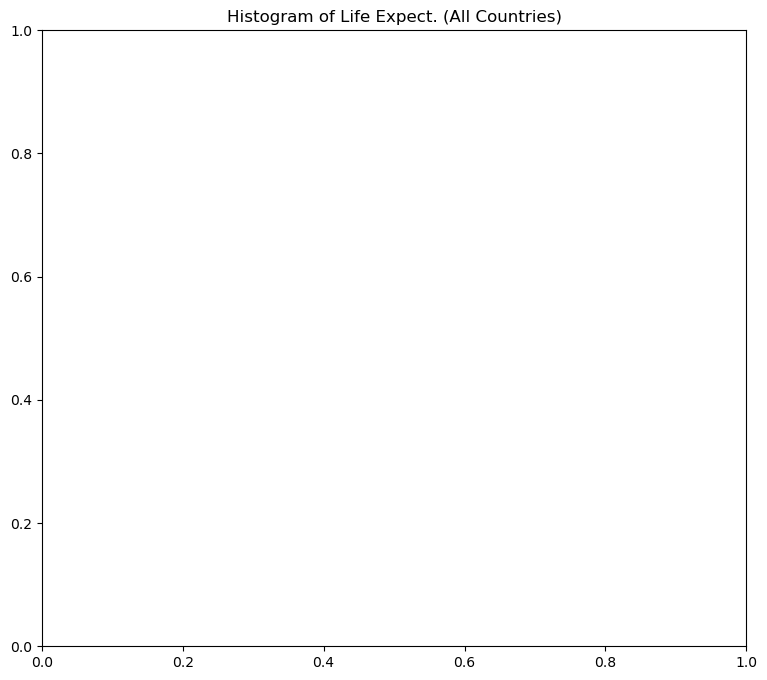

In [6]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Histogram of Life Expect. (All Countries)')
sns.distplot(y)

plt.subplot(1,2,2)
plt.title('Life Expect. (All Countries)')
sns.boxplot(y)


plt.show()

In [ ]:
plt.figure(figsize = (13, 13))

heatmap = sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, annot_kws={"fontsize":8})

heatmap.set_title('Who Life Expectancy Heatmap', fontdict = {'fontsize' : 18}, pad = 12)

In [ ]:
#Clustermap

#Clustermap table shows not only all correlation between variables, but also group (cluster) relationships.

#plt.figure(figsize = (4, 4))
#clustermap = sns.clustermap(raw_boston.corr(), vmin = -1, vmax = 1, annot = True)



In [ ]:
print(y.describe(percentiles = [0.05,0.25,0.5,0.75,0.9,0.95]))